# Program that runs the perceptron training algorithm with the step activation function u(·). 

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


 w0 is picked uniformly at random on [−1/4,1/4].
 w1 is picked uniformly at random on [−1, 1].
 w2 is picked uniformly at random on [−1, 1].

In [17]:
w0 = np.random.uniform(-0.25, 0.25)
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
w_initial = [w0, w1, w2]
print("Omega used for optimal output", w_initial)

Omega used for optimal output [0.1725772209319013, -0.8035117487562267, 0.197939727810317]


 n = 100 vectors x1, . . . , xn independently and uniformly at random on [−1, 1]2, call the collection of these vectors S.

In [18]:
S = np.random.uniform(low = -1, high = 1, size = [100, 2])
print(S)

[[ 2.08244423e-01 -6.20396789e-02]
 [ 4.06288030e-01 -1.66444868e-01]
 [ 3.62823325e-01  9.11896861e-01]
 [-8.87764640e-01  1.53453471e-01]
 [ 4.36547223e-01 -2.77639194e-01]
 [-2.27469297e-01 -5.42674922e-01]
 [ 4.31051249e-01  4.85917549e-02]
 [ 9.70946321e-01 -2.40014984e-01]
 [ 9.94729236e-01 -1.54849345e-01]
 [ 7.65280477e-01 -4.31963273e-01]
 [ 9.50004724e-01  5.87555747e-01]
 [ 6.45678385e-01 -8.54486648e-01]
 [-7.59788022e-01 -6.76190729e-01]
 [ 2.16644655e-01  3.66725587e-01]
 [ 4.43688992e-01 -1.06872098e-01]
 [ 4.97367994e-01 -1.91691713e-02]
 [-2.22923272e-02  1.30712798e-01]
 [ 5.65929744e-01  3.93819577e-01]
 [ 7.71960095e-01  2.70882880e-01]
 [-2.31478820e-01  2.02057511e-01]
 [ 6.84758981e-01  9.05114868e-01]
 [ 2.87960348e-01 -3.59817773e-01]
 [ 3.94485460e-01  3.45360770e-01]
 [-4.16211916e-01 -6.84727685e-01]
 [ 8.20063035e-01  6.47265645e-02]
 [-1.53910802e-01  6.51094142e-01]
 [-7.68974850e-01  1.50252572e-01]
 [ 1.96923736e-01 -9.07728112e-01]
 [-7.10723756e-01 -3

Let S1 ⊂ S denote the collection of all x = [x1 x2] ∈ S satisfying [1 x1 x2][w0 w1, w2]
T ≥ 0.
And S0 ⊂ S denote the collection of all x = [x1 x2] ∈ S satisfying [1 x1 x2][w0 w1, w2]
T < 0.

In [19]:
S1 = []
S0 = []
for vec in S:
    if(w0 + vec[0]*w1 + vec[1]*w2 >= 0):
        S1.append(vec)
    else:
        S0.append(vec)



In one plot, we have line w0 + w1x1 + w2x2 = 0, with x1 being the “x-axis” and x2 being the
“y-axis.” In the same plot, show all the points in S1 and all the points in S0. Use different
symbols for S0 and S1. Indicate which points belong to which class. 

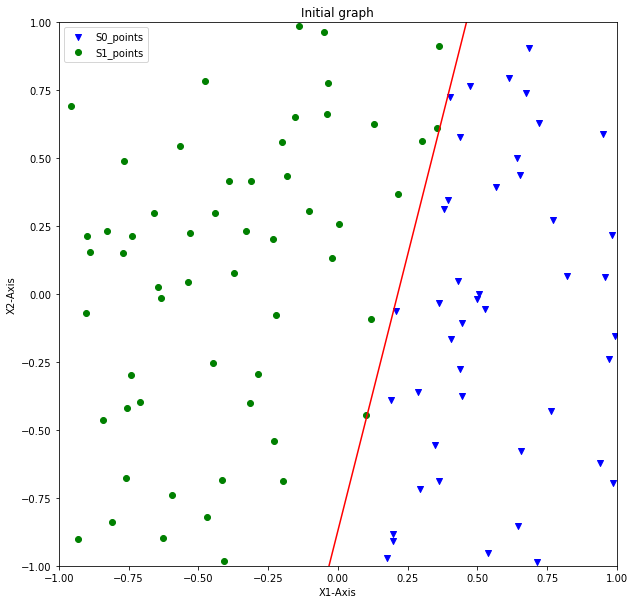

In [20]:
x = np.array([-1,1])
y = (-w0 - w1*x)/ w2
plt.figure(figsize=(10,10))
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.plot(x, y, c = 'r')
plt.xlabel('X1-Axis')
plt.ylabel('X2-Axis')
plt.title('Initial graph')
S0_x = [vec[0] for vec in S0]
S0_y = [vec[1] for vec in S0]
S1_x = [vec[0] for vec in S1]
S1_y = [vec[1] for vec in S1]
plt.scatter(S0_x, S0_y, c='blue', marker='v', label='S0_points') 
plt.scatter(S1_x, S1_y, c='green', marker='o', label='S1_points')
plt.legend()

Using the perceptron training algorithm to find the weights that can separate the two classes S0
and S1 (Obviously we already know such weights, they are w0, w1 and w2 above, but we will find
the weights from scratch, and the training sets S0 and S1).
we will use the training parameter η = 1.
w00, w01, w02 is picked independently and uniformly at random on [−1, 1]. 

In [21]:
learning_rate = 1
w0_ = np.random.uniform(-1,1)
w1_ = np.random.uniform(-1,1)
w2_ = np.random.uniform(-1,1)
weights = [w0_, w1_, w2_]
S0 = np.asarray(S0)
S1 = np.asarray(S1)

In [22]:
weights

[-0.030542901155785618, -0.130591104445831, -0.11214932604932337]

We have recorded the number of misclassifications if we use the weights [w00, w01, w02].
After one epoch of the perceptron training algorithm, you will find a new set of weights[w000, w001, w002].
Again recorded the number of misclassifications if we use the weights [w000, w001, w002].
we do another epoch of the perceptron training algorithm, find a new set of weights, record the
number of misclassifications, and so on, until convergence.

In [23]:
def step_function(val):
    if val >= 0:
        return 1
    return 0

In [24]:
def PTA(w, eta):
    epoch_no = 0
    no_misc = 0
    epochs = []
    list_mis = []
    while True:
        misclass = 0
        epoch_no += 1
        epochs.append(epoch_no)
        for inp in S:
            out = step_function(w[0]*1 + w[1]*inp[0] + w[2]*inp[1])
            if out == 1 and inp in S0:
                misclass += 1
                no_misc += 1
                w[0] = w[0] - eta*1
                w[1] = w[1] - eta*inp[0]
                w[2] = w[2] - eta*inp[1]
            elif out == 0 and inp in S1:
                misclass += 1
                no_misc += 1
                w[0] = w[0] + eta*1
                w[1] = w[1] + eta*inp[0]
                w[2] = w[2] + eta*inp[1]
        list_mis.append(misclass)
        if misclass == 0:
            return w, epoch_no, no_misc, epochs, list_mis
                
    

In [25]:
weigh, epochs, misclass_no, epoch_list, misclass_list = PTA(weights, learning_rate)
print(w_initial, weigh, epochs, misclass_no)

[0.1725772209319013, -0.8035117487562267, 0.197939727810317] [2.9694570988442144, -13.455669013523856, 3.3555061420055576] 83 277


We can see that the final weights are pretty close to the optimal weights[w0, w1, w2] in a sense that optimal w0 is almost equal to final w0 and ratio of optimal w1, w2 to similar to the ratio of the final w1, w2.

(k) Regarding the previous step, draw a graph that shows the epoch number vs the number of misclassifications.

Text(0.5,1,'Epoch number vs Number of misclassifications for learning rate = 1')

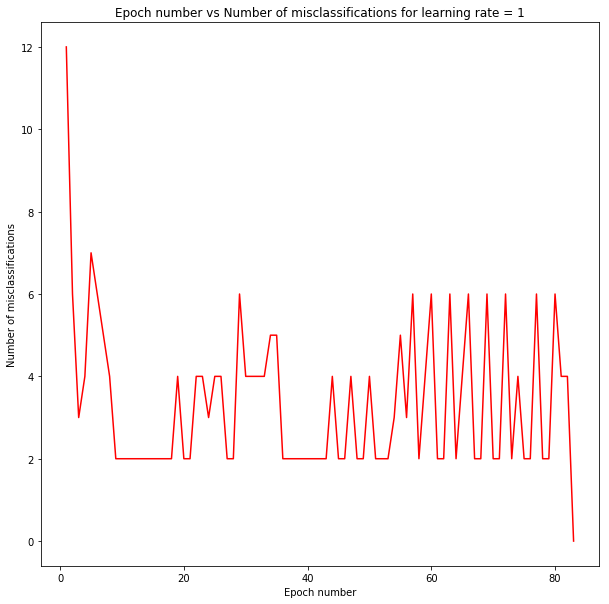

In [26]:
plt.figure(figsize=(10,10))
plt.plot(epoch_list,misclass_list, c = 'r')
plt.xlabel('Epoch number')
plt.ylabel('Number of misclassifications')
plt.title('Epoch number vs Number of misclassifications for learning rate = 1')

Run with (learning rate)η = 10. we have kept w0, w1, w2, S, w00, w01, w02 same. As in the case
η = 1, draw a graph that shows the epoch number vs the number of misclassifications.

In [27]:

weigh10, epochs10, misclass_no10, epoch_list10, misclass_list10 = PTA([w0_,w1_,w2_], 10)
print(weigh10, epochs10, misclass_no10)

[29.969457098844217, -135.59210282536944, 33.88336084176151] 81 279


Text(0.5,1,'Epoch number vs Number of misclassifications for learning rate = 10')

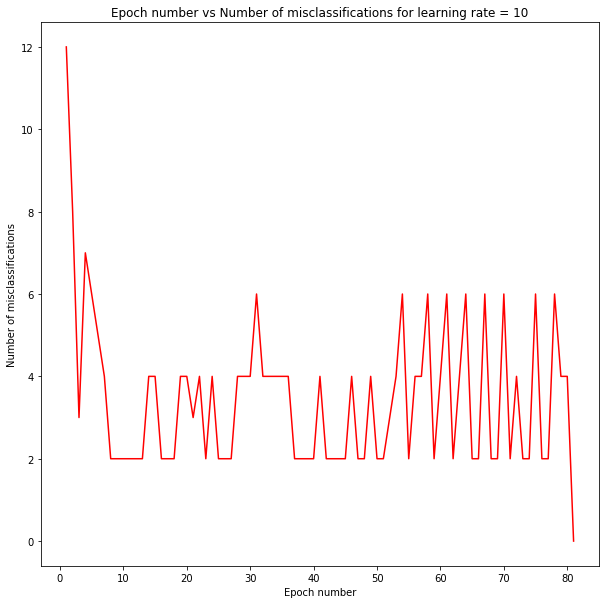

In [28]:
plt.figure(figsize=(10,10))
plt.plot(epoch_list10,misclass_list10, c = 'r')
plt.xlabel('Epoch number')
plt.ylabel('Number of misclassifications')
plt.title('Epoch number vs Number of misclassifications for learning rate = 10')

Run with (learning rate)η = 10.we have kept w0, w1, w2, S, w00, w01, w02 same. As in the case
η = 1, draw a graph that shows the epoch number vs the number of misclassifications

In [29]:

weigh01, epochs01, misclass_no01, epoch_list01, misclass_list01 = PTA([w0_,w1_,w2_], 0.1)
print(weigh01, epochs01, misclass_no01)

[0.16945709884421442, -0.7625374046918162, 0.1806221043027473] 19 76


Text(0.5,1,'Epoch number vs Number of misclassifications for learning rate = 0.1')

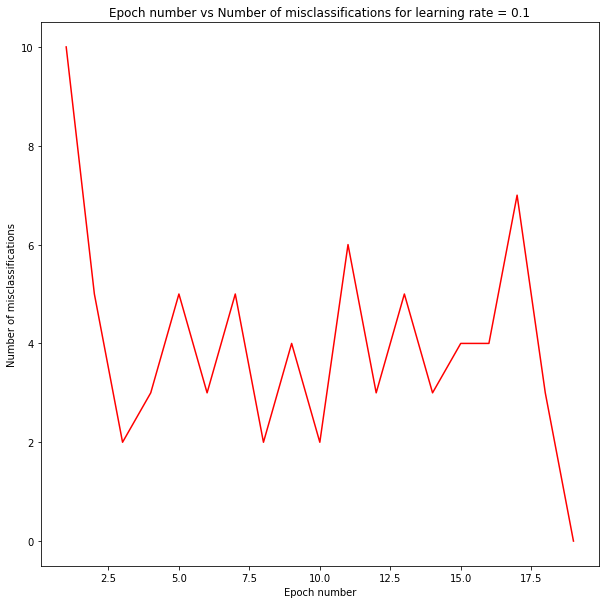

In [30]:
plt.figure(figsize=(10,10))
plt.plot(epoch_list01,misclass_list01, c = 'r')
plt.xlabel('Epoch number')
plt.ylabel('Number of misclassifications')
plt.title('Epoch number vs Number of misclassifications for learning rate = 0.1')

Apparently,as the η increases the number of epochs till the convergence increase. We can see from the graph that as the η (learning rate) becomes smaller there are less fluctuations in terms of the magnitude of misclassifications until the convergence. 

We won't get exact same result if we had started with different weights and S but the trend of the effects of η on training performance would be somewhat similar.